# Running DtDp PDF generator

Source environment:

In [ ]:
conda deactivate # Get out of the (igwn) environment. Make sure to have no active environment at all before sourcing.
source src/nu-dev/pynumods/bin/activate # Activate the pynu environment.

**Copy the dtdphase setup script to where you want to generate them**. The dtdphase setup script (run_dtdphase.sh) lives here:

In [ ]:
/home/hannah.griggs/nu/banks/pynu_tests/skyloc/tests/dtdphase/run_dtphase.sh

Find the GRB parameters for your GRB from https://docs.google.com/spreadsheets/d/1FuLUsVUoQGJPYha1vU2znyChYIt1mCyerwVhiiYxeBU/edit?usp=sharing

Run the PDF generator as:

In [ ]:
./run_dtphase.sh <grb-name> <gps-time> <ra> <dec> <sky-error>

The output should be one L1H1 PDF

In [ ]:
--output-file ${ifos[0]}${ifos[1]}-stat-${event_name}.hdf

Keep track of this file's location, you'll have a bunch of them

If you want to visualize the PDF, you can either open it in VScode or something, or make a quick plot on CIT jupyter with something like this:

In [ ]:
import h5py
import matplotlib.pyplot as plt

filename = "/home/hannah.griggs/nu/pynu_tests/skyloc/dtdphase/L1H1-stat-GRB170111815.hdf" 
event_name = 'GRB170111815'
with h5py.File(filename, 'r') as f:
    # Assuming 'ifo0' is the reference IFO dataset
    param_bin = f['H1/param_bin'][:]
    weights = f['H1/weights'][:]
    twidth = f.attrs['twidth']
    pwidth = f.attrs['pwidth']

plt.rcParams['font.size']=14
plt.rcParams['font.family']='serif'

# Extract the parameters of interest (e.g., tiSme and phase)
# Change these indices according to your specific parameters
param_time = param_bin['c0']*twidth*1000
param_phase = param_bin['c1']*pwidth

# Create a 2D histogram
plt.hist2d(param_time, param_phase, bins=(181, 74), weights=weights, cmap='viridis', density=True,label=event_desc)
plt.colorbar(label="Density of source events", format='%.0e')
plt.xlabel('Time Parameter $t_{H}-t_{L}$ (ms)',fontsize=14)
plt.ylabel('Phase Parameter $\phi_{H}-\phi_{L}$',fontsize=14)
plt.ylim(1.7,4.5)
plt.xlim(-10.5,10.5)

#plt.savefig('figures/timephaseSky_'+event_name+'.png')
plt.show()

Which should produce something that looks blobby, such as this:

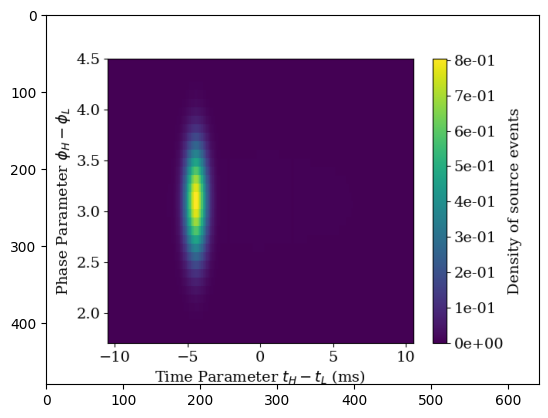

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('/Users/griggsks/Desktop/timephaseSky_GRB170111815.png')
imgplot = plt.imshow(img)
plt.show()